In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [131]:
data = pd.read_csv('datasets/boston_data.csv')

# Modele regression with numerical value

## Explore Data set

In [132]:
data.head()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   indus    333 non-null    float64
 2   chas     333 non-null    int64  
 3   nox      333 non-null    float64
 4   rm       333 non-null    float64
 5   age      333 non-null    float64
 6   dis      333 non-null    float64
 7   rad      333 non-null    int64  
 8   tax      333 non-null    int64  
 9   ptratio  333 non-null    float64
 10  lstat    333 non-null    float64
 11  medv     333 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 31.3 KB


In [134]:
data.describe()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,147.859438,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,1.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,123.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,244.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,377.000000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,506.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


## Plot Data Set to explore

Text(33.37500000000001, 0.5, 'median value of owner')

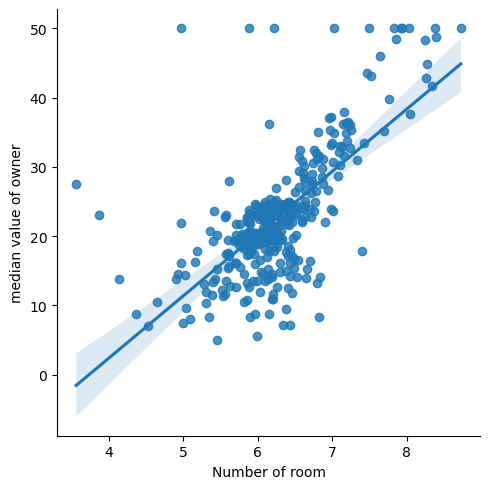

In [135]:
sns.lmplot(data=data, x="rm", y="medv")
plt.xlabel("Number of room")
plt.ylabel("median value of owner")
# Le nombre de pièce augmente le prix de la maison

Text(33.37500000000001, 0.5, 'median value of owner')

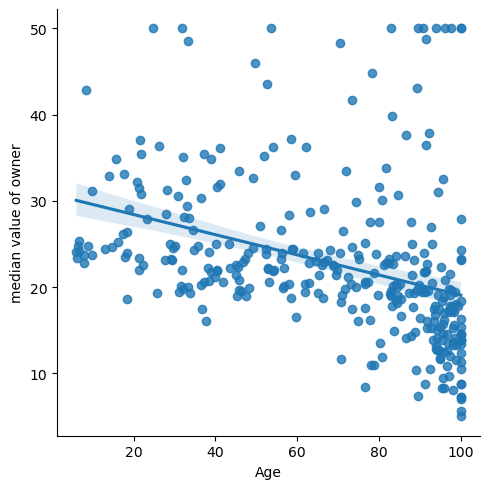

In [136]:
sns.lmplot(data=data, x="age", y="medv")
plt.xlabel("Age")
plt.ylabel("median value of owner")
# Plus les maisons sont agées, plus le prix dimlinue

## Regression Model

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(["medv"], axis=1)
Y = data["medv"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [138]:
model = LinearRegression()
model = model.fit(x_train, y_train)

In [139]:
y_pred = model.predict(x_test)

## Evalution du modèle

In [140]:
# To show our prediction and the reel values
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
160,48.3,37.243718
55,23.9,27.326102
49,23.4,26.566240
59,22.5,22.850707
170,26.2,24.685642
210,16.2,20.247000
54,28.0,29.157086
60,22.2,26.985721
276,11.0,15.877527
97,13.4,13.897418


In [141]:
print("Training score : ", model.score(x_train, y_train))

Training score :  0.7191154693675492


In [142]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print("Testing score : ", score)

Testing score :  0.6917086895657434


# Modele regression with categorical value

In [143]:
df_diamond = pd.read_csv('datasets/diamonds.csv', index_col=0)
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [144]:
df_diamond = df_diamond.sample(frac=0.2) # To select only 0.20 of dataset
df_diamond.reset_index(inplace=True, drop=True)

## Exploring data

C:\Users\bjauseau\AppData\Local\Temp\ipykernel_17456\1792708915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_diamond.corr()


<Axes: >

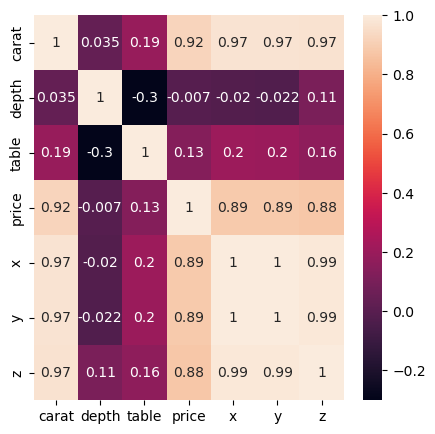

In [145]:
corr = df_diamond.corr()
import seaborn as sns
fig, ax, = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True)

In [146]:
print(df_diamond['cut'].unique())
print(df_diamond['color'].unique())
print(df_diamond['clarity'].unique())

['Good' 'Very Good' 'Premium' 'Ideal' 'Fair']
['D' 'I' 'H' 'E' 'G' 'J' 'F']
['SI1' 'VS2' 'SI2' 'VS1' 'I1' 'VVS1' 'VVS2' 'IF']


<Axes: title={'center': 'price'}, xlabel='cut'>

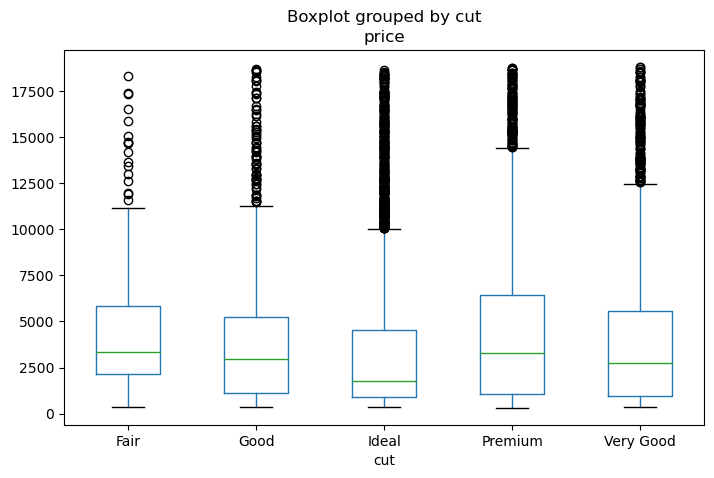

In [147]:
# To find pattern for the price
df_diamond.boxplot(by='cut', column=['price'], grid=False, figsize=(8,5))

<Axes: title={'center': 'price'}, xlabel='color'>

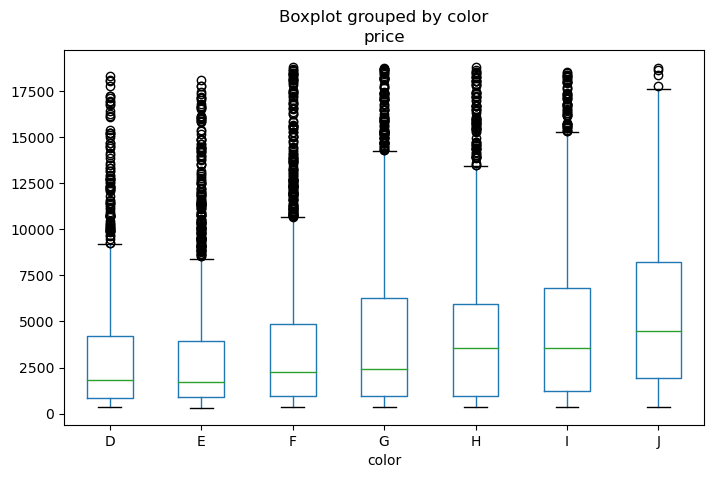

In [148]:
# To find pattern for the price
df_diamond.boxplot(by='color', column=['price'], grid=False, figsize=(8,5))

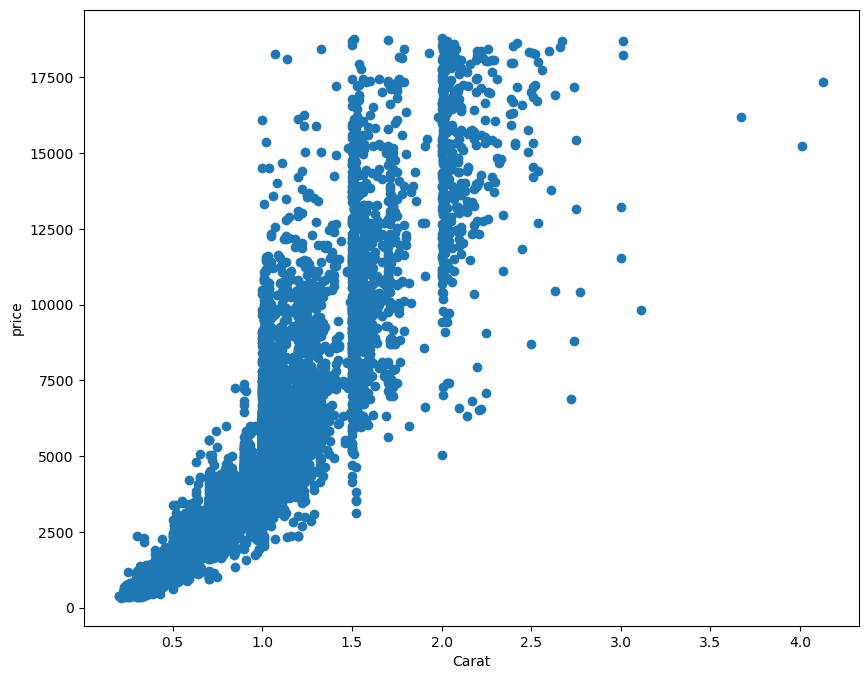

In [149]:
plt.subplots(figsize=(10,8))
plt.scatter(df_diamond['carat'], df_diamond['price'])
plt.xlabel('Carat')
plt.ylabel('price')
plt.show()

## Techniques Replace catégorie data by numbers

In [150]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2" : 1, "I1" : 0}
df_diamond['clarity'].replace(clarity_dict, inplace=True)

In [151]:
# Encodage à chaud pour les varibales ordinals
df_diamond = pd.get_dummies(df_diamond, columns=['cut', 'color'])
df_diamond.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.90,2,63.6,63.0,3755,6.03,6.07,3.85,0,1,0,0,0,1,0,0,0,0,0,0
1,2.01,3,59.6,60.0,16304,8.13,8.19,4.86,0,0,0,0,1,0,0,0,0,0,1,0
2,1.20,1,61.4,58.0,5779,6.81,6.77,4.17,0,0,0,1,0,0,0,0,0,1,0,0
3,1.53,3,61.6,58.0,16049,7.35,7.32,4.52,0,0,0,1,0,0,1,0,0,0,0,0
4,1.55,4,59.7,60.0,17773,7.62,7.56,4.53,0,0,0,1,0,1,0,0,0,0,0,0


In [152]:
## Separe numeric df and no-numeric
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_df = df_diamond[numeric_features]
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.800914,61.737514,57.470059,5.740523,5.741542,3.542941
std,0.475516,1.431228,2.228738,1.119101,1.111074,0.693126
min,0.200000,53.000000,51.600000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.730000,4.740000,2.920000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000
max,4.130000,72.900000,69.000000,10.140000,10.100000,6.430000


## Normalisation

In [153]:
from sklearn.preprocessing import scale
numeric_array = scale(numeric_df)

In [154]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,2.697138e-16,6.758982e-15,-7.706109e-16,8.990460e-17,-1.435839e-16,-1.870543e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.263767e+00,-6.105191e+00,-2.633926e+00,-5.129821e+00,-5.167800e+00,-5.111779e+00
25%,-8.431522e-01,-5.153255e-01,-6.596233e-01,-9.030190e-01,-9.014593e-01,-8.987836e-01
50%,-2.122297e-01,4.366111e-02,-2.109181e-01,-3.621181e-02,-2.838964e-02,-1.867169e-02
75%,5.028159e-01,5.327744e-01,6.864924e-01,7.144254e-01,7.096693e-01,7.027315e-01
max,7.001318e+00,7.799600e+00,5.173545e+00,3.931442e+00,3.922926e+00,4.165467e+00


In [155]:
df_diamond.drop(numeric_features, inplace=True, axis=1)
df_diamond.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,2,3755,0,1,0,0,0,1,0,0,0,0,0,0
1,3,16304,0,0,0,0,1,0,0,0,0,0,1,0
2,1,5779,0,0,0,1,0,0,0,0,0,1,0,0
3,3,16049,0,0,0,1,0,0,1,0,0,0,0,0
4,4,17773,0,0,0,1,0,1,0,0,0,0,0,0


In [156]:
df_diamond = pd.concat([df_diamond, numeric_df], axis=1) # to concat the data frame normalised

## Linear regression application

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_diamond.drop(["price"], axis=1)
Y = df_diamond["price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [160]:
model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [161]:
# To show our prediction and the reel values
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
9447,3045,3929.0
1678,1547,1745.0
265,16340,12992.0
10040,618,461.0
8839,2342,2186.0
10133,2343,2347.0
3716,345,-1057.0
6850,17036,13164.0
6067,977,1233.0
9927,6499,6339.0


In [162]:
from sklearn.metrics import r2_score
print("Training score : ", model.score(x_train, y_train))

score = r2_score(y_test, y_pred)
print("Testing score : ", score)

Training score :  0.908058225626405
Testing score :  0.914704530127647


## Exemple of differents techniques of regression

In [163]:
def linear_model(x_train, y_train):
    print("Linear Regression")
    linear_regression = LinearRegression()
    
    linear_regression.fit(x_train, y_train)
    
    return linear_regression

In [164]:
from sklearn.linear_model import Lasso
def lasso_model(x_train, y_train):
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    
    lasso_regression.fit(x_train, y_train)
    
    return lasso_regression

In [166]:
from sklearn.linear_model import Ridge
def ridge_model(x_train, y_train):
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    
    ridge_regression.fit(x_train, y_train)
    
    return ridge_regression

In [177]:
from sklearn.linear_model import SGDRegressor
def sgd_model(x_train, y_train):
    print("SGD Regression")
    sgd_regression = SGDRegressor(alpha=0.9)
    
    sgd_regression.fit(x_train, y_train)
    
    return sgd_regression

In [173]:
def build_and_train_model(data, target_name, reg_fn):
    
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.2, random_state=0)
    
    model = reg_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)
    
    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    return {'model' : model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred' : y_pred}

In [174]:
linear_reg = build_and_train_model(df_diamond, "price", linear_model)

Linear Regression
Training Score :  0.908058225626405
Testing Score :  0.914704530127647


In [175]:
lasso_reg = build_and_train_model(df_diamond, "price", lasso_model)

Lasso Regression
Training Score :  0.9079857042208584
Testing Score :  0.914407212172395


In [176]:
ridge_reg = build_and_train_model(df_diamond, "price", ridge_model)

Ridge Regression
Training Score :  0.9080554218475139
Testing Score :  0.9146986993606084


In [179]:
sgd_reg = build_and_train_model(df_diamond, "price", sgd_model)

SGD Regression
Training Score :  0.809500866199512
Testing Score :  0.8280678857858026
